In [45]:
from matplotlib import rcParams, pyplot as plt

directory = "../fig/"
import plotly.graph_objects as go
figsize = (4, 2 * 3**0.5)

In [2]:
import numpy as np
from typing import Union
from matplotlib.axes import Axes
from matplotlib.image import AxesImage
from matplotlib.colors import Colormap, LogNorm


def pascal_triangle(size: int) -> np.ndarray:
    """Creates an array representation of pascal's triangle (right-angled)
    Args:
        size: width and height of the triangle
    Returns:
        A 2D numpy array containing the triangle. The triangle is
        right-angled and the elements where the triangle is not defined
        are filled with zeros.

    """
    grid = np.zeros((size, size), dtype=np.uint64)
    grid[:, 0] = 1
    for i in range(1, size):
        for j in range(1, size):
            grid[i, j] = grid[i - 1, j - 1] + grid[i - 1, j]
    return grid


def draw_pascal_triangle(ax: Axes, size: int, fontsize: int = 10,
                         normalize: bool = True) -> None:
    """Plots pascal's triangle with the given size on ax
    Args:
        ax: matplotlib axes object
        size: width and height of the triangle
        fontsize: font size of the numbers
        normalize: whether or not to normalize the coordinates
            and the axes' limits to make the triangle equilateral
    """
    grid = pascal_triangle(size)
    hor = 1
    if normalize:
        ver = 3**0.5 / 2 * hor
    else:
        ver = hor

    for i in range(size):
        for j in range(i + 1):
            ax.text((size - i + 2 * j) * hor,
                    (2 * (size - 1 - i) + 1) * ver,
                    str(int(grid[i][j])), fontsize=fontsize,
                    ha="center", va="center")

    if normalize:
        ax.set_xlim(0, 2 * hor * (size - 1))
        ax.set_ylim(0, 2 * ver * (size - 1))


def draw_pascal_fractal(ax: Axes, size: int,
                        draw_numbers: bool = True, fontsize: float = 10,
                        cmap: Union[Colormap, str]="rainbow") -> AxesImage:
    """Draws the serpinski triangle inside pascal's triangle
    This is achieved by connecting the odd numbers in pascal's triangle
    Args:
        ax: matplotlib axes object
        size: width and height of the triangle
        draw_numbers: wheter or not to draw pascal's triangle
            on top of the fractal
        fontsize: font size of the numbers
        cmap: The colormap used for coloring the points. The points are
            colored according to the ratio of their number to the maximum
            number in the triangle. Logarithmic normalization is applied
            for better distinction.
    Returns:
        output of imshow
    """
    grid = pascal_fractal(size)

    image = ax.imshow(np.flip(grid, axis=0), origin="lower",
                      extent=(0, 2 * size, 0, 2 * size),
                      norm=LogNorm(), cmap=cmap)
    if draw_numbers:
        draw_pascal_triangle(ax, size, fontsize, False)

    ax.set_aspect('auto')
    return image


def pascal_fractal(size: int) -> np.ndarray:
    """Masked array representation of pascal's triangle serpinski fractal
    Suitable for use with imshow
    Args:
        size: width and height of the triangle
    Returns:
        Masked numpy array containing the serpinski triangle inside
        pascal's triangle. The numbers are repeated four times in squares
        and the squares are centered. Even numbers are masked.
    """
    grid = _pascal_triangle_map(size)
    return np.ma.masked_where(grid % 2 == 0, grid)


def _pascal_triangle_map(size: int) -> np.ndarray:
    """Array representation of pascal's triangle, centered
    Args:
        size (int): width and height of the triangle
    Returns:
        Numpy array containing centered pascal's triangle. The numbers
        are repeated four times in squares and the squares are centered.
        Elements where the triangle is not defined are filled with zeros.
    """
    grid = pascal_triangle(size)
    grid = grid.repeat(2, axis=0)
    grid = grid.repeat(2, axis=1)

    shifts = np.linspace(size - 1, 0, size).astype(int)
    shifts = shifts.repeat(2)
    return _apply_shifts(grid, shifts)


def _apply_shifts(array: np.ndarray, shifts: np.ndarray) -> np.ndarray:
    """Applies different shifts to diffrent rows of a numpy array
    Args:
        array: the numpy array
        shifts: shift amounts as a numpy array
    Returns:
        the numpy array with shifted rows
    """
    row, col = np.ogrid[:array.shape[0], :array.shape[1]]
    col = col - shifts[:, np.newaxis]
    return array[row, col]

In [6]:
pascal_triangle(10)

array([[  1,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  1,   1,   0,   0,   0,   0,   0,   0,   0,   0],
       [  1,   2,   1,   0,   0,   0,   0,   0,   0,   0],
       [  1,   3,   3,   1,   0,   0,   0,   0,   0,   0],
       [  1,   4,   6,   4,   1,   0,   0,   0,   0,   0],
       [  1,   5,  10,  10,   5,   1,   0,   0,   0,   0],
       [  1,   6,  15,  20,  15,   6,   1,   0,   0,   0],
       [  1,   7,  21,  35,  35,  21,   7,   1,   0,   0],
       [  1,   8,  28,  56,  70,  56,  28,   8,   1,   0],
       [  1,   9,  36,  84, 126, 126,  84,  36,   9,   1]], dtype=uint64)

FileNotFoundError: [Errno 2] No such file or directory: '../fig/pascal-triangle-fractal.pdf'

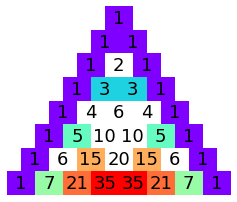

In [3]:
fig, ax = plt.subplots(figsize=figsize)
ax.set_axis_off()

draw_pascal_fractal(ax, 8, fontsize=18)

plt.savefig(directory + "pascal-triangle-fractal.pdf", bbox_inches="tight")

FileNotFoundError: [Errno 2] No such file or directory: '../fig/pascal-fractal.pdf'

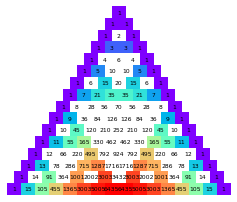

In [4]:
fig, ax = plt.subplots(figsize=figsize)
ax.set_axis_off()

draw_pascal_fractal(ax, 16, fontsize=6)

plt.savefig(directory + "pascal-fractal.pdf", bbox_inches="tight")

C:\Users\MSI gf65\AppData\Local\Temp\ipykernel_26344\3478224997.py:22: RuntimeWarning: overflow encountered in ulonglong_scalars
  grid[i, j] = grid[i - 1, j - 1] + grid[i - 1, j]


FileNotFoundError: [Errno 2] No such file or directory: '../fig/pascal-fractal-big.pdf'

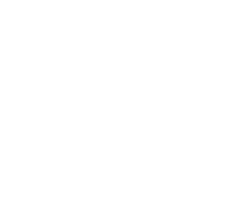

In [5]:
fig, ax = plt.subplots(figsize=figsize)
ax.set_axis_off()

draw_pascal_fractal(ax, 256, draw_numbers=False)

plt.savefig(directory + "pascal-fractal-big.pdf", bbox_inches="tight", dpi=1000)

In [53]:
def pascalTriangle(size: int):
    nums = np.zeros((size, size))
    nums[:, 0] = 1
    for i in range(1, size):
        for j in range(1, size):
            nums[i, j] = nums[i - 1, j - 1] + nums[i - 1, j]
    return nums

In [123]:
def getCoordination(i,j,l):
    xO = l*(j-i/2)
    yO = -l*i
    x1,x2 = xO + l/2 , xO -l/2
    y1,y2 = yO + l/2 , yO -l/2
    return [x1,x2,x2,x1],[y1,y1,y2,y2],xO,yO


def getPolygon(i,j,l,color,text):
    x,y,xt,yt = getCoordination(i,j,l)
    polygon = go.Scatter(
    x=x,
    y=y,
    showlegend=False,
    mode="lines",
    fill="toself",
    line=dict(color=color, width=2),)

    textObject = dict(font=dict(color='black',size=int(l)),
                                        x=xt,
                                        y=yt,
                                        showarrow=False,
                                        text=int(text),
                                        textangle=0,
                                        xanchor='center'
                                        )

    return polygon,textObject



In [124]:
def drawPascal(size:int,length:float):
    nums = pascalTriangle(size)
    polygons = []
    textObjects = []
    for i in range(size):
        for j in range(i+1):
            color = "blue" if nums[i][j]%2==0 else "red"
            polygon ,textObject = getPolygon(i,j,length,color,nums[i][j])
            polygons.append(polygon)
            textObjects.append(textObject)

    fig = go.Figure(polygons)

    for obj in textObjects:
        fig.add_annotation(obj)

    fig.show()
    #fig.write_image(name+".png")

In [125]:
drawPascal(20,10)